### Lie's circle geometry with WIT
This notebook deals with the circle geometry of Lie and its treatment by means of WIT. 

Its salient features are a summary of the main theoretical concepts, a set of functions to cover the main computational aspects, and examples to illustrate the procedures.

A very useful reference for our purposes has been the book <i>Geometriekalküle</i> of
Jürgen Richter-Gebert and Thorsten Orendt (Springer, 2009), particularly Ch. 10
(Kreisgeometrie).


#### Loading the system
We first load WIT and define a few handy utilities for calculations with floats. These are
particularly useful for the graphical side of the story.

In [18]:
from PyM import *

# Utilities to cope with the symbolic use of floats

EPS = 1/10**10
def notnil(x): return abs(x)>=EPS
def nil(x): return abs(x)<EPS
def nonneg(x): return (notnil(x) and x>0) or nil(x)

# Q_type is the type of PyECC rational numbers
def is_number(x):
    if isinstance(x, (int, float, complex,QQ_type)) and not isinstance(x, bool): 
        return True
    else: return False
#
def is_real(x):
    if is_number(x) and not isinstance(x,complex): return True
    else: return False

is_pair = ispair

#### Lie vectors

The <i>Lie vector</i> of the circle with center 
$M=(a,b)$ (<i>midpoint</i>) and radius $R$ is the 5-vector 
$$
[w,1-w,a,b,R],\quad w=(1+a^2+b^2-R^2)/2.
$$
In particular, points are encoded as circles of radius 0.

Comparing with the Cartesian equation: 
$$
(x-a)^2+(y-b)^2=R^2,\quad \text{or}$$
$$x^2+y^2-2ax-2by+c,\quad c=a^2+b^2-R^2,$$
we see that $w=(1+c)/2$, $1-w=(1-c)/2$.

For nonzero $R$, the orientation of the circle is encoded as the sign of $R$, a convention
that is consistent with the customary parametric representation of the circle:
$$
(x,y)=(a+R\cos(t), b+R\sin(t)),\quad t\in [0,2\pi).
$$


The Lie vector of the line with normal vector $M=(a,b)$ 
that is incident with the point $R=(u,v)$ is the 5-vector
$$
\left[d,-d,a,b,\sqrt{a^2+b^2}\right],\quad d=au+bv.
$$
Lines can be considered as circles of radius $\infty$. In fact, 
it is a straightforward exercise to show that the Lie vector of the circle through the point $R=(u,v)$ with center at the point $M=(u+ta,v+tb)$
becomes, when $r\to\infty$, the Lie vector of the line through $R$ with normal vector $(a,b)$.


In [19]:
def Lie_vector(M=(0,0),R=0):
    a, b = M
    if is_pair(R):
        u,v = R
        d = a*u+b*v
        #from math import sqrt
        return [d,-d,a,b,sqrt(a**2+b**2)] 
    if is_real(R):
        u = (1+a**2+b**2-R**2)/2
        return [u,1-u,a,b,R]
    return 'Lie_vector: wrong parameters' 
#
LV = lie_vector=Lie_vector

def orientation(X):
    r = X[4]
    if r>0: return 1
    elif r<0: return -1
    else: return "orientation: object has no orientation"

show(Lie_vector())
show(lie_vector((2,3),0))
show(LV((2,3),9))
show(LV((2,3),(-1,1)))

[0.5, 0.5, 0, 0, 0] 

[7.0, -6.0, 2, 3, 0] 

[-33.5, 34.5, 2, 3, 9] 

[1, -1, 2, 3, 3.605551275463989] 



#### The Lie metric 

It is defined on 5-vectors by the formula
$$
L(X,Y)=-x_1y_1+x_2y_2+x_3y_3+x_4y_4-x_5y_5.
$$
Thus its signature is $(-,+,+,+,-)$.

In the implementations, we add a definition for 4-vectors identified with the 5-vectors whose last component is 0.

In [20]:
def Lie_metric(X,Y):
    if len(X)==len(Y)==4: # make them 5-vectors
        X[4] = Y[4] = 0
    x1,x2,x3,x4,x5 = X
    y1,y2,y3,y4,y5 = Y
    lm = -x1*y1 + x2*y2 + x3*y3 + x4*y4 - x5*y5
    if nil(lm): return 0
    return lm
#
LM = lie_metric = Lie_metric

X = LV((2,3),3)
Y = LV((1,-2),2)

L = LV((2,3),(-1,1))

show(Lie_metric(X,Y))
show(lie_metric(X,L))
show(LM(Y,L))

show(LM([1,2,0,-5,7],[2,1,3,8,-1]))

-12.5 

1.183346173608033 

-12.21110255092798 

-33 



#### Theorem

If $X$ and $Y$ are Lie vectors, the relation $L(X,Y)=0$ is satisfied
if and only if the corresponding circles have an oriented contact.

<i><b>Remarks.</b></i> 
Two distinct circles that touch intersect at a single point. The contact is internal 
(external) if they have the same (distinct) orientation.

If one of the circles is a line, the distinction is whether the normal vector to the line
is pointing inward or outward of the circle.

If $X$ is a point, the notion of oriented contact
just means that the circle or line corresponding to $Y$ 
goes through the point corresponding to $X$.
If in addition $Y$ is a point, it means that the points coincide.

For the examples below, the following picture should be helpful. The red and black circles have an
oriented contact if and only if they have opposite orientations. Similarly, the blue and black circles
have an oriented contact if and only if they have the same orientation. In the case of the vertical line
$x=2$, it has an oriented contact with the red circle if it is oriented upwards and withe the black circle if 
it is oriented downwards.

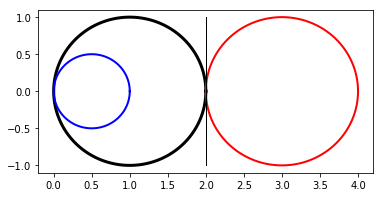

In [21]:
C = [(1,0),1]
E = [(3,0),1]
I = [(0.5,0),0.5]


# plotting
close('all')

fig = plt.figure("Touching circles", figsize=(6,3))
#plt.axis('off')

# Drawing these circles
cfr(C, lw=3)
cfr(E, lw=2, color='r')
cfr(I, lw=2, color='b')
seg((2,-1),(2,1),lw=1)

In [22]:
X = LV((1,0),1)     # black circle +
Y = LV((3,0),1)     # red circle   +
Z = LV((0.5,0),0.5) # blue circle  +

L = LV((1,0),(2,0)) # line x=2, up

show(LM(X,Y))  # no oriented contact

show(LM(X,mirror(Y))) # oriented contact

show(LM(X,Z))  # oriented contact

show(LM(X,L))  # no oriented contact

show(LM(X,mirror(L)))  # oriented contact

show(LM(Y,L))  # oriented contact



-2.0 

0 

0 

-2.0 

0 

0 



#### Lie quadratic form

It is the quadratic form of the Lie metric. 
It defines a non-degenerate quadric $\bar{\cal C}$ in
$\mathbf{P}^4$. The points of this quadric are precisely those represented by the Lie vectors
of circles, lines and points of the plane, together with the point $\infty=[1,-1,0,0,0]$. In other words, it is a one-point compactification of $\cal C$, the space of circles in the Euclidean plain obtained by adding points (as circles of radius 0) and lines (as either circles
of radius $\infty$ or circles going through $\infty$).

In [23]:
def Lie_form(X): return Lie_metric(X,X)
#
LF = lie_form=Lie_form

show(LF(X), LF(Y), LF(L))

show(LF([1,2,0,-5,7]))

0 0 0 

-21 



#### The Lie-Gram matrix of a sequence of 5-vectors

In [24]:
def lie_gram_matrix(*S):
    M = [[Lie_metric(X,Y) for X in S] for Y in S]
    return M 

#### Useful predicates

<b>Theorem</b>. A non-zero 5-vector is proportional to a Lie vector if an only if it is isotropic (by the Lie metric). 
If that is the case, its <i>normalization</i> is the proportional vector
that is a Lie vector.

<i><b>Remark.</b></i> Henceforth we extend the notion of Lie vector to include all nonzero isotropic vectors. Thus the former notion coincides with that of normalized Lie vectors. 

In [25]:
def is_lie_vector(X): 
    return len(X)==5 and nil(lie_form(X)) and notnil(dot(X,X))

def lie_type(X):
    if len(X)!=5 or nil(dot(X,X)): 
        return 'Lie_type: object must be a non-zero 5-vector'
    if notnil(Lie_form(X)): return -1
    elif nil(X[4]): return 0
    elif nil(X[0]+X[1]): return 1
    else: return 2
#
LT = Lie_type = lie_type
    
def is_point(X):
    if Lie_type(X)==0: return True
    else: return False

def is_line(X):
    if Lie_type(X)==1: return True
    else: return False

def is_circle(X): 
    if Lie_type(X)==2: return True
    else: return False
    
show(is_circle(X))
show(is_circle(L))
show(is_line(L))
show(is_point(LV()))
    

True 

False 

True 

True 



#### `normalize(X)` and `reorient(X)`

The first function normalizes an isotropic 5-vector to a Lie vector and the second reverses the
orientation of $X$. Symbolically, this operation will be denoted $\bar{X}$.

In [26]:
def normalize(A):
    X = list(A[:])
    if not is_lie_vector(X): return 'normalize: object is not a Lie vector'
    if notnil(X[4]) and notnil(X[0]+X[1]):
        s = X[0]+X[1]
        return [x/s for x in X]
    else: return X
    
def reorient(A): 
    X = A[:]
    if not isinstance(X,list): return 'reorient: parameter is not a list'
    if len(X)!=5: return 'reorient: wrong length of object'
    X[4] = -X[4]
    return X
#
mirror = reorient

#### Get Euclidean objects from Lie vectors

In [27]:
def circle(X):
    if is_circle(X): 
        Xn = normalize(X[:])
        return [(Xn[2],Xn[3]),Xn[4]]
    else: return 'circle: the object does not correspond to a circle'

def line(X):
    if is_line(X): 
        d = X[0]
        a,b = X[2:4]
        if notnil(a): return [(a,b),(d/a,0)]
        elif notnil(b): return [(a,b),(0,d/b)]
        else: return 'line: no non-zero orthogonal vector'
    else: return 'line: object is not a Lie line'

def point(X):
    if is_point(X):
        return (X[2],X[3])
    else: return 'point: this message should not occur'

#### Lie angular metric, crossing types, and crossing angles
With this metric we can obtain the crossing angle of two circles.

In [28]:
def Lie_angular_metric(X,Y):
    x1,x2,x3,x4,x5 = X
    if x5==0: return 'Lie_angular_metric: first object is not a circle'
    y1,y2,y3,y4,y5 = Y
    if y5==0: return 'Lie_angular_metric: second object is not a circle'
    x1=x1/x5; x2=x2/x5; x3=x3/x5; x4=x4/x5 
    y1=y1/y5; y2=y2/y5; y3=y3/y5; y4=y4/y5 
    lam = -x1*y1 + x2*y2 + x3*y3 + x4*y4
    if nil(lam): return 0
    else: return lam
# 
LAM = lie_angular_metric = Lie_angular_metric

def crossing_type(X,Y):
    x1,x2,x3,x4,x5 = X
    if x5==0: return 'crossing_type: first object is not a circle'
    y1,y2,y3,y4,y5 = Y
    if y5==0: return 'crossing_type: second object is not a circle'
    o = orientation(X)*orientation(Y)
    s = Lie_angular_metric(X,Y)
    if o==1:
        if s<-1: return 'external circles'
        elif s==-1: return 'external touching'
        elif s<1:
            if s==0: return 'orthogonal crossing'
            else: return 'crossing circles'
        elif s==1: return 'internal touching'
        elif s>1: return 'nested circles'
    else: 
        if s>1: return 'external circles'
        elif s==1: return 'external touching'
        elif s>-1:
            if s==0: return 'orthogonal crossing'
            else: return 'crossing circles'
        elif s==-1: return 'internal touching'
        elif s<-1: return 'nested circles'
    return 'crossing_type: could not decide'
        

def crossing_angle(X,Y):
    x1,x2,x3,x4,x5 = X
    if x5==0: return 'crossing_angle: first object is a point'
    y1,y2,y3,y4,y5 = Y
    if y5==0: return 'crossing_angle: second object is a point'
    from math import acos
    am = Lie_angular_metric(X,Y)
    if am<-1 or am>1:
        return 'crossing_angle: objects do not cross' 
    return acos(Lie_angular_metric(X,Y))

#### `solve_quadratic(a,b,c)`

Solving a quadratic homogeneous equation $ax^2+bxy+cy^2$, given a,b,c.

In [29]:
def solve_quadratic(a,b,c):
    if nil(a**2+b**2+c**2): 
        return 'solve_quadratic: at least one entry should be nonzero'
    if notnil(a):
        D = b**2-4*a*c
        from math import sqrt
        if nonneg(D):
            return [((-b+sqrt(D))/(2*a),1),((-b-sqrt(D))/(2*a),1)]
        else: 
            print('solve_quadratic: no real roots')
            return 0
    elif notnil(c): return [(1,0),(1,-2*b/c)]
    else: return [(0,1),(1,0)]

#### Cutting the Lie quadric with a line

Given three linearly independent 5-vectors $X, Y, Z$, which may or may not
belong to the Lie quadric, the next function finds the (normalized) intersections
with the Lie isotropic cone of the plane Lie-orthogonal to $\langle X, Y, Z\rangle$. This amounts to cut the Lie quadric with the line represented by
$\langle X, Y, Z\rangle^{\perp_L}$.


In [30]:
def Lie_section(A,B,C):
    X = A[:]; X[0]=-X[0]; X[4]=-X[4]
    Y = B[:]; Y[0]=-Y[0]; Y[4]=-Y[4]
    Z = C[:]; Z[0]=-Z[0]; Z[4]=-Z[4]
    import sympy
    M = sympy.Matrix([X,Y,Z])
    K = M.nullspace()
    #X = vector(X); Y = vector(Y); Z = vector(Z)
    #M = stack(X,Y,Z)
    #K = kernel(M)
    #if ncols(K)>2: return 'lie_section: Infinite solutions'
    #else: 
    #    v = K[:,0]
    #    w = K[:,1]
    
    if len(K)>2: return 'lie_section: Infinite solutions'
    else: [v,w] = K
    G = lie_gram_matrix(v,w) 
    st = solve_quadratic(G[0][0],2*G[0][1],G[1][1])
    if st==0: 
        print('lie_section: imaginary Lie objects')
        return 0
    s,t = st
    s1,s2 = s; t1,t2=t
    S = list(s1*v + s2*w); T = list(t1*v + t2*w)
    return normalize(S), normalize(T)
#
lie_section = Lie_section

#### Examples

There are two circles (possibly imaginary) that properly touch three given circles $X,Y,Z$.
These circles are delivered by `Lie_section(X,Y,Z)` and we may denote them by the expression
&#9675;$(X,Y,Z)$.

Changing the orientations of $X,Y,Z$ simultaneously, &#9675;$(\bar{X},\bar{Y},\bar{Z})$ yields
the same pair of circles, but with exchanged roles
with respect to the kind of oriented tangency. 

It follows that we get four pairs of circles touchig the three given ones: 
&#9675;$(X,Y,Z)$, &#9675;$(X,Y,\bar{Z})$, &#9675;$(X,\bar{Y},Z)$, and &#9675;$(X,\bar{Y},\bar{Z})$.


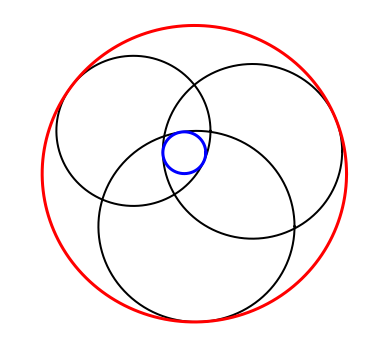

In [31]:
X = Lie_vector((6,4.25),3.5) 
Y = Lie_vector((8,7),3.2)
Z = Lie_vector((3.75,7.75),2.75)

#print(circle(X))

# plotting
close('all')

fig = plt.figure(figsize=(6,6))
plt.axis('off')

cfr(circle(X), lw=2)
cfr(circle(Y), lw=2)
cfr(circle(Z), lw=2)

ST = lie_section(X,Y,Z)
if ST == 0: print('no real circles of kind +++')
else: 
    S, T = ST
    cfr(circle(S),lw=3,color='r')
    cfr(circle(T),lw=3,color='b')
plt.show()
#show(X,Y,Z,Yb,Zb)

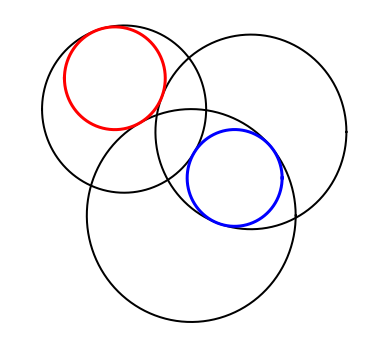

In [32]:
# plotting
close('all')

fig2 = plt.figure(figsize=(6,6))
plt.axis('off')

#show(X,Y,Z,Yb,Zb)

Zb = mirror(Z)

cfr(circle(X), lw=2)
cfr(circle(Y), lw=2)
cfr(circle(Zb), lw=2)

ST = lie_section(X,Y,Zb)
if ST == 0: print('no real circles of kind ++-')
else: 
    S, T = ST
    cfr(circle(S),lw=3,color='r')
    cfr(circle(T),lw=3,color='b')
plt.show()



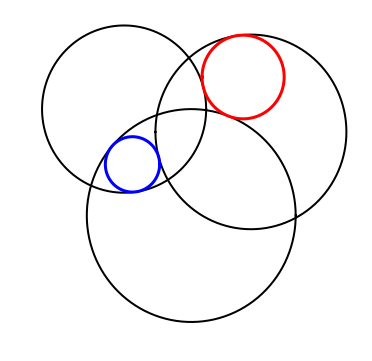

In [33]:
# plotting
close('all')

fig3 = plt.figure(figsize=(6,6))
plt.axis('off')

Yb = mirror(Y)
cfr(circle(X), lw=2)
cfr(circle(Yb), lw=2)
cfr(circle(Z), lw=2)

ST = lie_section(X,Yb,Z)
if ST == 0: print('no real circles of kind +-+')
else: 
    S, T = ST
    cfr(circle(S),lw=3,color='r')
    cfr(circle(T),lw=3,color='b')
plt.show()



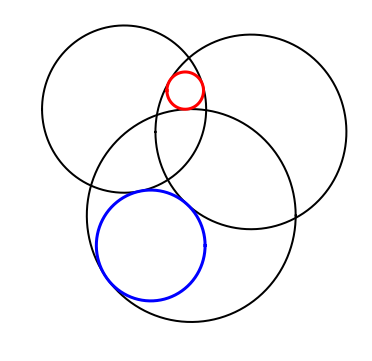

In [34]:

fig4 = plt.figure(figsize=(6,6))
plt.axis('off')
cfr(circle(X), lw=2)
cfr(circle(Yb), lw=2)
cfr(circle(Zb), lw=2)

ST = lie_section(X,Yb,Zb)
if ST == 0: print('no real circles of kind +--')
else: 
    S, T = ST
    cfr(circle(S),lw=3,color='r')
    cfr(circle(T),lw=3,color='b')
plt.show()